Data load from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#for Sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
df = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [35]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


**Perform Exploratory Data Analysis (EDA) analysis on the following**

1. Descriptive Statistics

In [36]:
df['headline_line'] = df['headline'].str.len()
print(df['headline_line'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_line, dtype: float64


**Articles per Publisher:**

In [39]:
Articles_per_publisher = df['publisher'].value_counts()
print(Articles_per_publisher)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


**Publication Dates Analysis**
- Check date format

In [53]:
df['publication_date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
articles_per_day = df.groupby(df['publication_date'].dt.date).size()
print(articles_per_day)

publication_date
2011-04-28      3
2011-04-29      2
2011-04-30      1
2011-05-01      1
2011-05-02      9
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Length: 2502, dtype: int64


Time series plot showing the number of articles per day

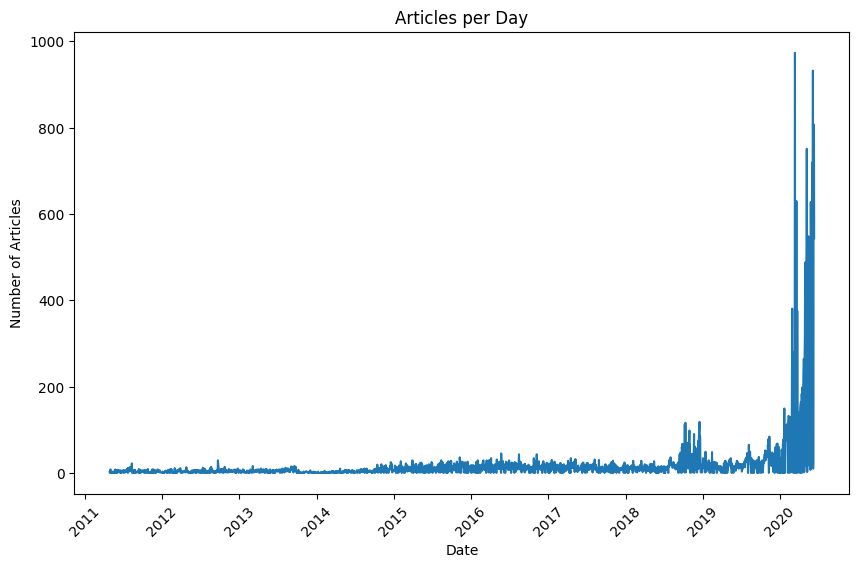

In [57]:
#plot
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line')
plt.title('Articles per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show();

2. Text Analysis(Sentiment analysis & Topic Modeling)

In [60]:
nltk.download('vader_lexicon')
senti = SentimentIntensityAnalyzer()
df['sentiment']  =  df['headline'].apply(lambda x: senti.polarity_scores(x)['compound'])
print(df[['headline', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday      0.000
1         Stocks That Hit 52-Week Highs On Wednesday      0.000
2                      71 Biggest Movers From Friday      0.000
3       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  B of A Securities Maintains Neutral on Agilent...      0.296


Extracting topics or significant events

In [69]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])

word_counts = X.sum(axis=0).A1

words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame(zip(words, word_counts), columns=['Word', 'Count'])

word_freq_df_sorted = word_freq_df.sort_values(by='Count', ascending=False)

print(word_freq_df_sorted.head(10))


            Word   Count
104259        vs  162099
93662     stocks  161776
40857        est  140604
40388        eps  128897
63981     market  120558
89240     shares  114313
83568    reports  108710
101800    update   91723
37999   earnings   87399
86676      sales   79645


3. Time Series Analysis

<Axes: xlabel='publication_date'>

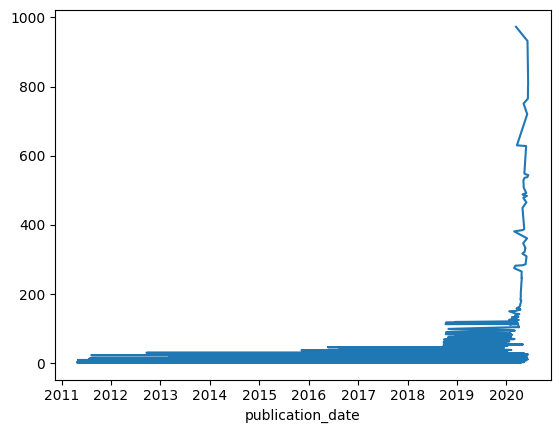

In [72]:
# df['publication_date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
df['publication_date'].dt.date.value_counts().plot(kind='line')

4. Publisher Analysis

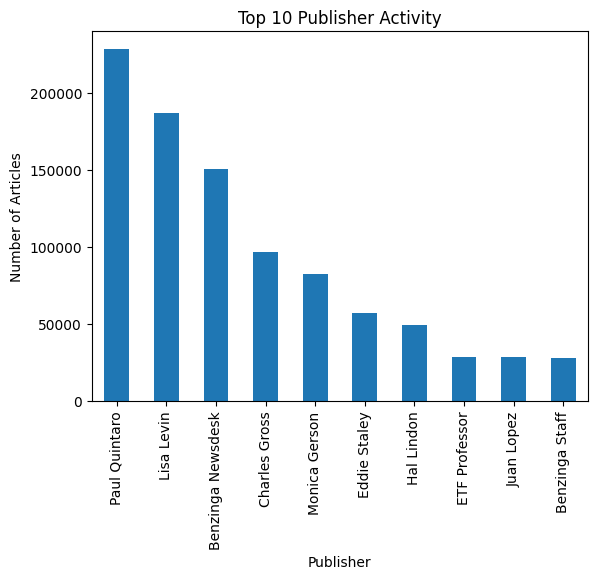

In [78]:
publisher_activity = df['publisher'].value_counts()
publisher_activity.head(10).plot(kind='bar')
plt.title('Top 10 Publisher Activity')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show();